In [9]:
import re
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Data preparation and exploration

In [4]:
filename = "emotion_dataset.txt"

# Read the file
with open(filename, 'r') as file:
    lines = file.readlines()  

# Each line as a json dictionary
dataset = [json.loads(line) for line in lines]

df = pd.DataFrame(dataset)

# Mostrar las primeras filas del DataFrame
df.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the firepl...,2
4,i am feeling grouchy,3


In [6]:
# Check missing values
print("\nMissing values per colummn:")
print(df.isnull().sum())


Missing values per colummn:
text     0
label    0
dtype: int64


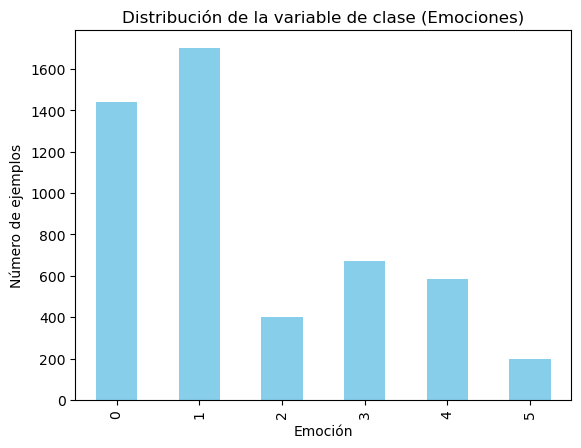

In [13]:
# Data distribution
class_distribution = df['label'].value_counts().sort_index()

class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribución de la variable de clase (Emociones)')
plt.xlabel('Emoción')
plt.ylabel('Número de ejemplos')
plt.show()


Stadistics:
count    5000.000000
mean       97.761600
std        56.732182
min        11.000000
25%        53.000000
50%        86.000000
75%       130.000000
max       299.000000
Name: text_length, dtype: float64


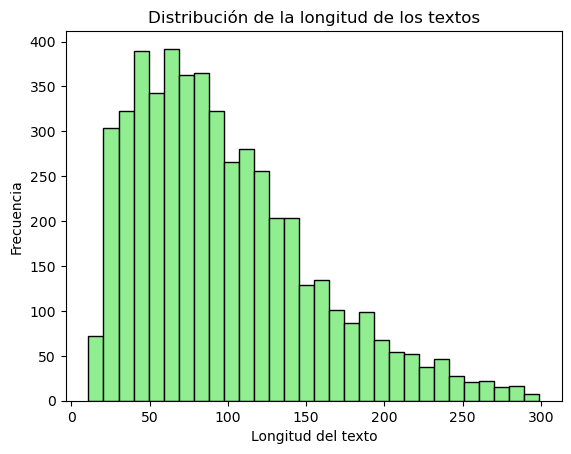

In [15]:
# Text lengths
df['text_length'] = df['text'].apply(len)

print("\nStadistics:")
print(df['text_length'].describe())

plt.hist(df['text_length'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribución de la longitud de los textos')
plt.xlabel('Longitud del texto')
plt.ylabel('Frecuencia')
plt.show()


c:\Users\Usuario\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [22]:
X = df["text"]
y = df["label"]

#temporal variable to divide in test and validation
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=123)

#test and validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=123)

# Sizings
print(f"Training data size: {len(X_train)}")
print(f"Validation data size: {len(X_val)}")
print(f"Teste data size: {len(X_test)}")


Training data size: 3500
Validation data size: 750
Teste data size: 750


In [26]:
# Vectorizer TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

print(f"Training data TF-IDF: {X_train_tfidf.shape}")
print(f"Validation data TF-IDF: {X_val_tfidf.shape}")
print(f"Test data TF-IDF: {X_test_tfidf.shape}")

Dimensiones del conjunto de entrenamiento TF-IDF: (3500, 5000)
Dimensiones del conjunto de validación TF-IDF: (750, 5000)
Dimensiones del conjunto de prueba TF-IDF: (750, 5000)
